In [1]:
!wget -nc 140.114.76.113:8000/pA1.csv 
!wget -nc 140.114.76.113:8000/pA2.csv

File ‘pA1.csv’ already there; not retrieving.

File ‘pA2.csv’ already there; not retrieving.



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader

In [0]:
seed = 999
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True

## A1

In [4]:
class Data:
    def __init__(self, csv_path):
        super().__init__()
        self.anns = pd.read_csv(csv_path).to_dict('records')

    def __len__(self):
        return len(self.anns)

    def __getitem__(self, idx):
        ann = self.anns[idx]
        x = torch.tensor(ann['x'])
        y = torch.tensor(ann['y'])
        return x, y

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.a = nn.Parameter(torch.rand(1) * 0.001)
        self.b = nn.Parameter(torch.rand(1) * 0.001)
    
    def forward(self, xs):
        ps = self.a * xs + self.b
        return ps



data = Data('./pA1.csv')
loader = DataLoader(data, batch_size=5)

device = 'cpu'
model = Net().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

history = {
    'loss': [],
    'loss1': [],
    'a': [],
    'b': []
}

for epoch in range(75):
    for xs, ys in iter(loader):
        xs = xs.to(device)
        ys = ys.to(device)

        optimizer.zero_grad()
        ps = model(xs)
        loss = criterion(ps, ys)
        loss.backward()
        optimizer.step()

        if loss.detach().item() < 5:
          history['loss'].append([loss.detach().item()])
          history['loss1'].append(loss.detach().item())
          history['a'].append(model.a.item())
          history['b'].append(model.b.item())

print(model.a)
print(model.b)
#print(history['loss'])

Parameter containing:
tensor([5.0274], requires_grad=True)
Parameter containing:
tensor([3.9726], requires_grad=True)


In [0]:
X = np.array(history['a'])
Y = np.array(history['b'])
X, Y = np.meshgrid(X, Y) 
loss = history['loss']
loss1 = history['loss1']
Z = np.array(loss)

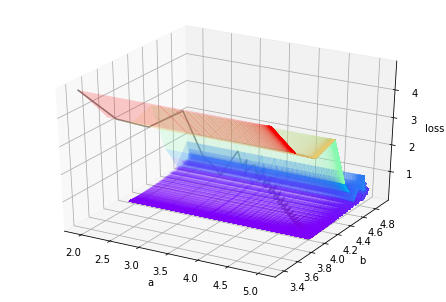

In [6]:
# need sometime to plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'),alpha=0.2)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('loss')

X = np.array(history['a'])
Y = np.array(history['b'])
Z = np.array(loss1)

#fig = plt.figure()
#ax = plt.axes(projection='3d')

ax.plot(X, Y, Z, 'gray')

plt.show()

## A2

In [0]:
from torch.autograd import Variable
from torch import Tensor

class Data:
    def __init__(self, csv_path):
        super().__init__()
        self.anns = pd.read_csv(csv_path).to_dict('records')

    def __len__(self):
        return len(self.anns)

    def __getitem__(self, idx):
        ann = self.anns[idx]
        x = torch.tensor(ann['x'])
        y = torch.tensor(ann['y'])
        return x, y


class poly(nn.Module):
    def __init__(self):
        super(poly, self).__init__()
        self.fc1 = nn.Linear(2, 1)
        #self.fc2 = nn.Linear(2, 1)
        #self.model.a = nn.Parameter(torch.rand(1) * 0.001)
        #self.model.b = nn.Parameter(torch.rand(1) * 0.001)
        #self.model.c = nn.Parameter(torch.rand(1) * 0.001)
    
    def forward(self, xs):
        #ps = self.model.a * xs.pow(2) + self.model.b * xs + self.model.c
        #fc1 = self.fc1(xs)
        y_pred = self.fc1(xs)
        return y_pred


data = Data('./pA2.csv')
loader = DataLoader(data, batch_size=1)

device = 'cpu'
model = poly().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

history = {
    'loss': [],
    'w0': [],
    'w1': [],
    'w2': []
}

for epoch in range(80):
    for xs, ys in iter(loader):
        xs = xs.to(device)
        xs = Variable(Tensor([xs**2,xs]))
        ys = ys.to(device)

        optimizer.zero_grad()
        ps = model(xs)
        loss = criterion(ps, ys)
        loss.backward()
        optimizer.step()

        history['loss'].append(loss.detach().item())

In [8]:
print('a & b:', model.fc1.weight)
print('c:', model.fc1.bias)

a & b: Parameter containing:
tensor([[-1.9622,  0.9732]], requires_grad=True)
c: Parameter containing:
tensor([4.0121], requires_grad=True)


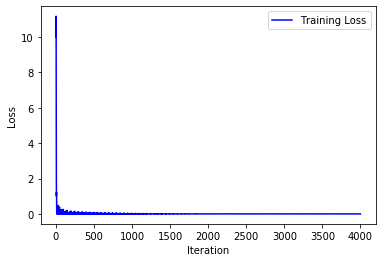

In [9]:
epoch = 80

# Get training and test loss histories
training_loss = history['loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'b')
plt.legend(['Training Loss'])
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show();